In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.shape

(550068, 12)

In [4]:
data.index

RangeIndex(start=0, stop=550068, step=1)

In [5]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
data.duplicated().sum()

0

In [8]:
data.drop('User_ID', axis=1, inplace=True)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df = data.copy()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [11]:
data.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
data.isna().sum().sum()

556885

In [13]:
data.rename(columns={"Age":"Age_Group","Occupation":"Occupation_Category","Stay_In_Current_City_Years":"Current_Stay","Purchase":"Purchase_Amount"}, inplace=True)
df = data.copy()

In [14]:
data.tail()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
550063,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [15]:
def column_val_count(df_input):
    for i in df_input.columns:
        print(f'{i}\n{df_input[i].value_counts()}\n')

column_val_count(data)

Product_ID
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

Gender
Gender
M    414259
F    135809
Name: count, dtype: int64

Age_Group
Age_Group
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Occupation_Category
Occupation_Category
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

City_Category
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

Current_Stay
Current_Stay
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, d

In [16]:
product_category_2 = data['Product_Category_2'].mode(dropna=True)[0]
product_category_2 = product_category_2
product_category_2

8.0

In [17]:
data['Product_Category_2'].fillna(value = product_category_2, inplace=True)

In [18]:
data['Product_Category_2'].isna().sum()

0

In [19]:
product_category_3 = data['Product_Category_3'].mode()[0]
product_category_3

16.0

In [20]:
data['Product_Category_3'].fillna(value = product_category_3, inplace=True)

In [21]:
data['Product_Category_3'].isna().sum()

0

In [22]:
data.isna().sum()

Product_ID             0
Gender                 0
Age_Group              0
Occupation_Category    0
City_Category          0
Current_Stay           0
Marital_Status         0
Product_Category_1     0
Product_Category_2     0
Product_Category_3     0
Purchase_Amount        0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Product_ID           550068 non-null  object 
 1   Gender               550068 non-null  object 
 2   Age_Group            550068 non-null  object 
 3   Occupation_Category  550068 non-null  int64  
 4   City_Category        550068 non-null  object 
 5   Current_Stay         550068 non-null  object 
 6   Marital_Status       550068 non-null  int64  
 7   Product_Category_1   550068 non-null  int64  
 8   Product_Category_2   550068 non-null  float64
 9   Product_Category_3   550068 non-null  float64
 10  Purchase_Amount      550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [24]:
data['Product_Category_2'] = data['Product_Category_2'].astype(int)
data['Product_Category_2'].dtype

dtype('int32')

In [25]:
data['Product_Category_3'] = data['Product_Category_3'].astype(int)
data['Product_Category_3'].dtype

dtype('int32')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Product_ID           550068 non-null  object
 1   Gender               550068 non-null  object
 2   Age_Group            550068 non-null  object
 3   Occupation_Category  550068 non-null  int64 
 4   City_Category        550068 non-null  object
 5   Current_Stay         550068 non-null  object
 6   Marital_Status       550068 non-null  int64 
 7   Product_Category_1   550068 non-null  int64 
 8   Product_Category_2   550068 non-null  int32 
 9   Product_Category_3   550068 non-null  int32 
 10  Purchase_Amount      550068 non-null  int64 
dtypes: int32(2), int64(4), object(5)
memory usage: 42.0+ MB


In [27]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [28]:
data.Age_Group.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [29]:
data['Age_Group'] = data['Age_Group'].map({"0-17":"Children","55+":"Old","26-35":"Adult","46-50":"Adult","51-55":"Old","36-45":"Adult","18-25":"Young Adult"})

In [30]:
data['Marital_Status'] = data['Marital_Status'].map({0:"Unmarried",1:"Married"})

In [31]:
data.duplicated().sum()

201

In [32]:
data.drop_duplicates(inplace=True)

In [33]:
data.duplicated().sum()

0

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549867 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Product_ID           549867 non-null  object
 1   Gender               549867 non-null  object
 2   Age_Group            549867 non-null  object
 3   Occupation_Category  549867 non-null  int64 
 4   City_Category        549867 non-null  object
 5   Current_Stay         549867 non-null  object
 6   Marital_Status       549867 non-null  object
 7   Product_Category_1   549867 non-null  int64 
 8   Product_Category_2   549867 non-null  int32 
 9   Product_Category_3   549867 non-null  int32 
 10  Purchase_Amount      549867 non-null  int64 
dtypes: int32(2), int64(3), object(6)
memory usage: 46.1+ MB


In [35]:
data.head()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,P00069042,F,Children,10,A,2,Unmarried,3,8,16,8370
1,P00248942,F,Children,10,A,2,Unmarried,1,6,14,15200
2,P00087842,F,Children,10,A,2,Unmarried,12,8,16,1422
3,P00085442,F,Children,10,A,2,Unmarried,12,14,16,1057
4,P00285442,M,Old,16,C,4+,Unmarried,8,8,16,7969


In [36]:
df = data.copy()

Text(0.5, 1.0, 'Count of genders')

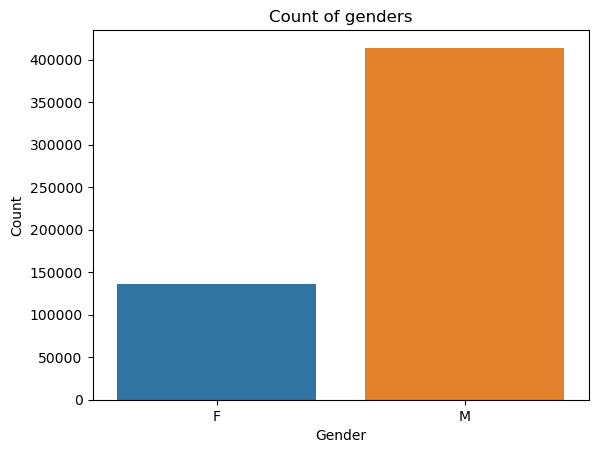

In [37]:
sns.countplot(x='Gender', data = data)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of genders")

Text(0.5, 1.0, 'Count of different Age Groups')

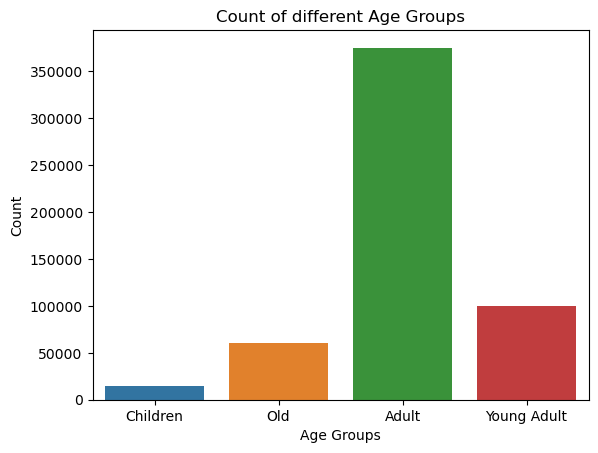

In [38]:
sns.countplot(x='Age_Group', data = data)
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.title("Count of different Age Groups")

Text(0.5, 1.0, 'Count of different Occupation Categories')

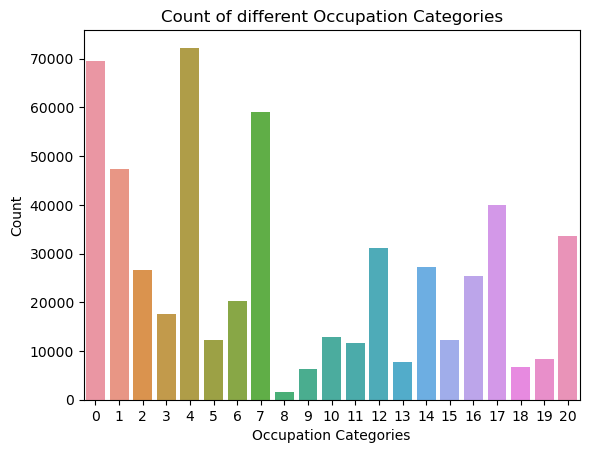

In [39]:
sns.countplot(x='Occupation_Category', data = data)
plt.xlabel("Occupation Categories")
plt.ylabel("Count")
plt.title("Count of different Occupation Categories")

<Axes: xlabel='Occupation_Category', ylabel='Density'>

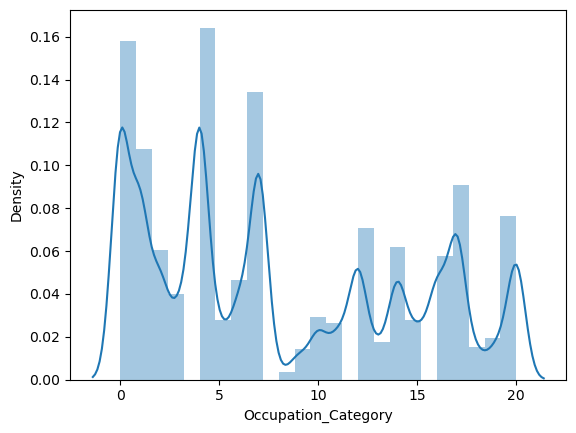

In [40]:
sns.distplot(data['Occupation_Category'],kde=True,bins=25)

Text(0.5, 1.0, 'Count of different City Categories')

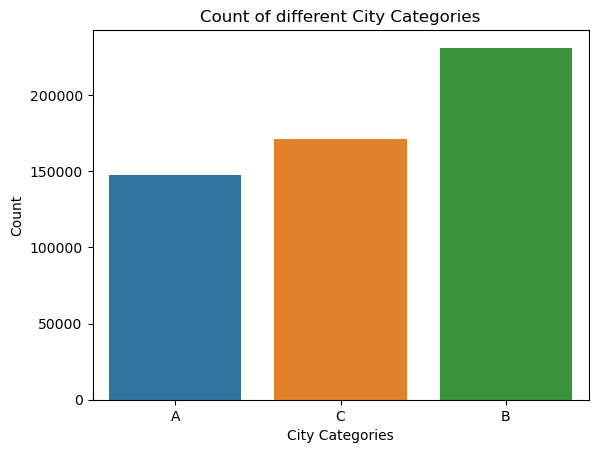

In [41]:
sns.countplot(x='City_Category', data=data)
plt.xlabel("City Categories")
plt.ylabel("Count")
plt.title("Count of different City Categories")

In [42]:
city_categories = data['City_Category'].value_counts()
city_categories

City_Category
B    231093
C    171088
A    147686
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x250a28dac50>,
 [Text(0.11153972338204002, 0.4359574407070695, 'City B'),
  Text(-0.3998653838836723, -0.20641626576305314, 'City C'),
  Text(0.2990879268555926, -0.3362237528926588, 'City A')],
 [Text(0.30983256495011113, 1.2109928908529708, '42.0%'),
  Text(-1.1107371774546453, -0.573378516008481, '31.1%'),
  Text(0.8307997968210905, -0.9339548691462745, '26.9%')])

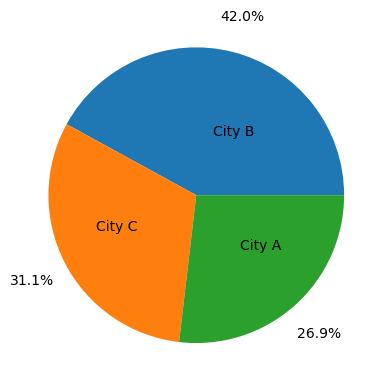

In [43]:
plt.pie(city_categories, labels=['City B','City C','City A'], autopct='%0.1f%%', pctdistance=1.25, labeldistance=0.45)

Text(0.5, 1.0, 'Count of number of years staying in the same city')

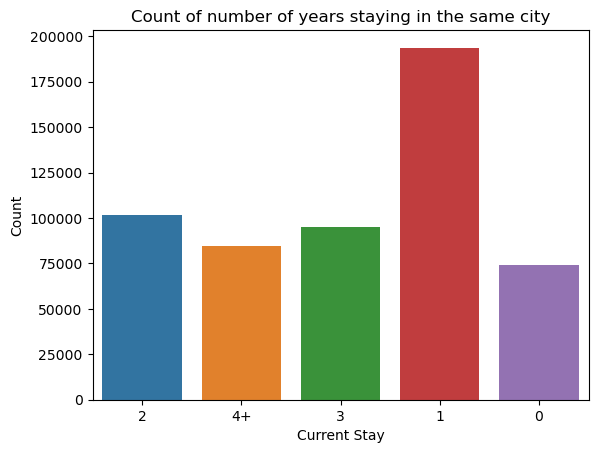

In [44]:
sns.countplot(x='Current_Stay', data=data)
plt.xlabel("Current Stay")
plt.ylabel("Count")
plt.title("Count of number of years staying in the same city")

Text(0.5, 1.0, 'Count based on Marital Status')

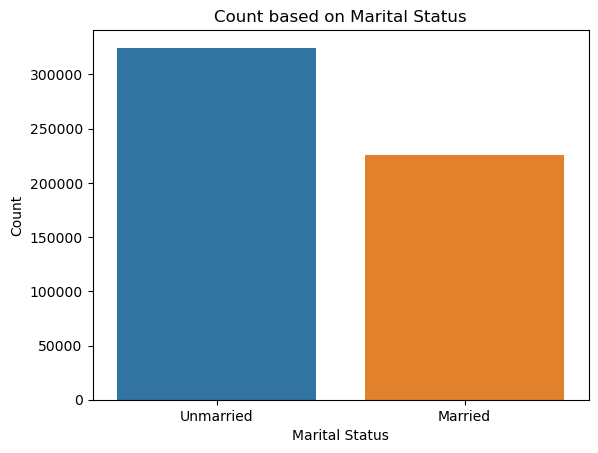

In [45]:
sns.countplot(x='Marital_Status', data=data)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Count based on Marital Status")

Text(0.5, 1.0, 'Count of different Products in Category 1')

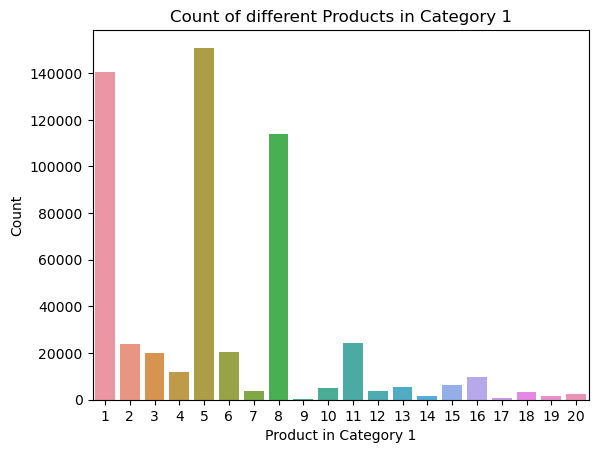

In [46]:
sns.countplot(x='Product_Category_1', data=data)
plt.xlabel("Product in Category 1")
plt.ylabel("Count")
plt.title("Count of different Products in Category 1")

<Axes: xlabel='Product_Category_1', ylabel='Density'>

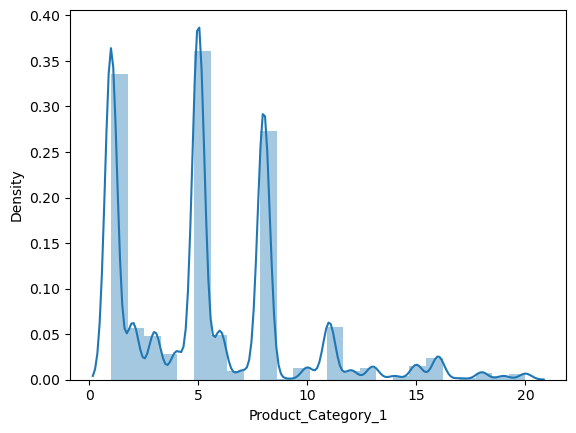

In [47]:
sns.distplot(data['Product_Category_1'],kde=True,bins=25)

Text(0.5, 1.0, 'Count of different Products in Category 2')

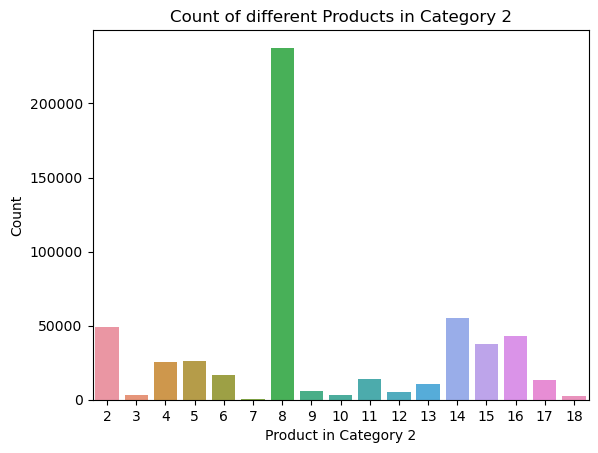

In [48]:
sns.countplot(x='Product_Category_2', data=data)
plt.xlabel("Product in Category 2")
plt.ylabel("Count")
plt.title("Count of different Products in Category 2")

<Axes: xlabel='Product_Category_2', ylabel='Density'>

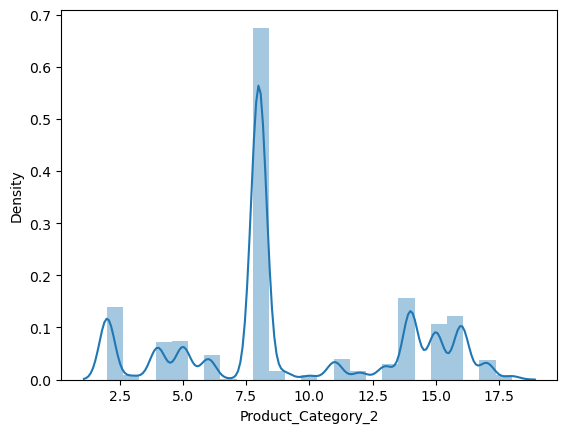

In [49]:
sns.distplot(data['Product_Category_2'],kde=True,bins=25)

Text(0.5, 1.0, 'Count of different Products in Category 3')

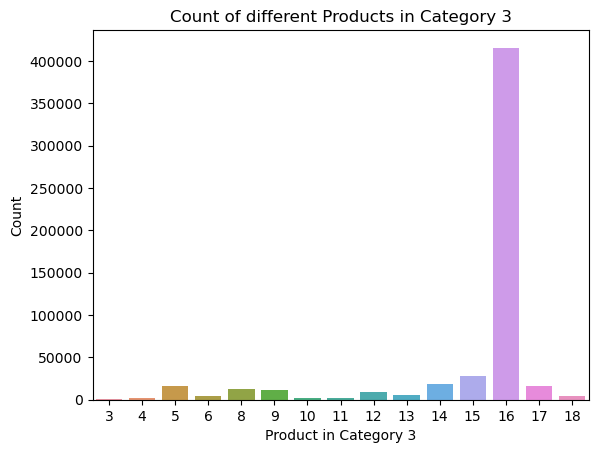

In [50]:
sns.countplot(x='Product_Category_3', data=data)
plt.xlabel("Product in Category 3")
plt.ylabel("Count")
plt.title("Count of different Products in Category 3")

<Axes: xlabel='Product_Category_3', ylabel='Density'>

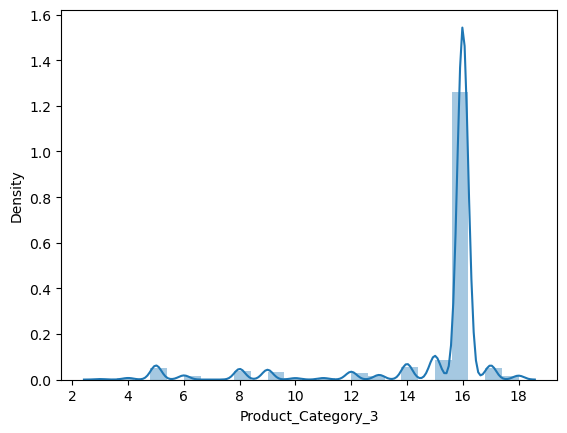

In [51]:
sns.distplot(data['Product_Category_3'],kde=True,bins=25)

<Axes: xlabel='Purchase_Amount', ylabel='Density'>

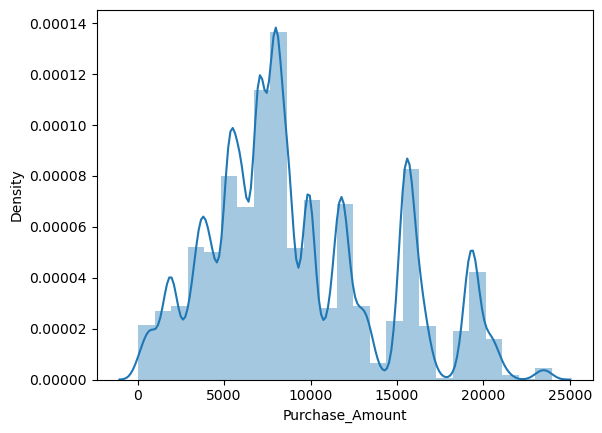

In [52]:
sns.distplot(data['Purchase_Amount'],kde=True,bins=25)

In [53]:
gender_purchase = data.groupby('Gender')['Purchase_Amount'].mean()
gender_purchase

Gender
F    8735.166370
M    9439.303597
Name: Purchase_Amount, dtype: float64

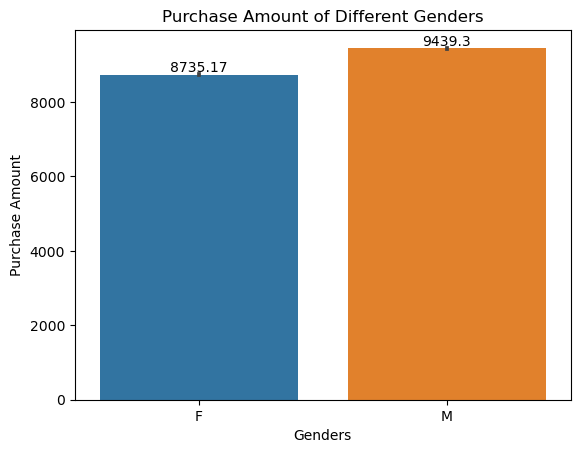

In [54]:
ax = sns.barplot(x='Gender',y='Purchase_Amount', data=data)
plt.xlabel("Genders")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount of Different Genders")

for i in ax.containers:
    ax.bar_label(i,)

In [55]:
age_group_purchase = data.groupby('Age_Group')['Purchase_Amount'].mean()
age_group_purchase

Age_Group
Adult          9271.979131
Children       8934.292517
Old            9464.050020
Young Adult    9171.285521
Name: Purchase_Amount, dtype: float64

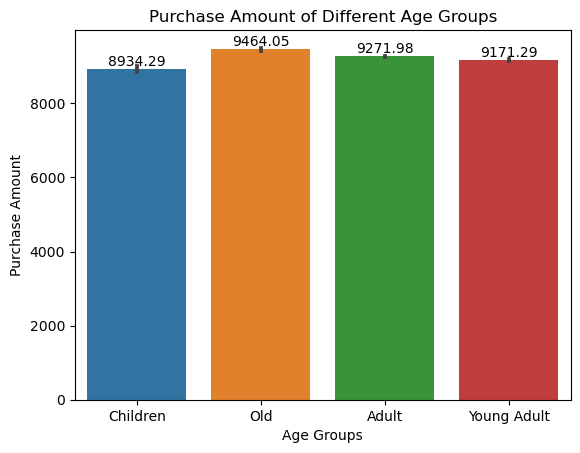

In [56]:
ax = sns.barplot(x='Age_Group',y='Purchase_Amount', data=data)
plt.xlabel("Age Groups")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount of Different Age Groups")

for i in ax.containers:
    ax.bar_label(i,)

In [57]:
occupation_category_purchase = data.groupby('Occupation_Category')['Purchase_Amount'].mean()
occupation_category_purchase

Occupation_Category
0     9125.573128
1     8953.623930
2     8953.245345
3     9178.639526
4     9215.938011
5     9334.462132
6     9257.020686
7     9428.720190
8     9532.592497
9     8640.428526
10    8960.326346
11    9214.638066
12    9797.593127
13    9307.547561
14    9502.198029
15    9779.655623
16    9396.373443
17    9825.377833
18    9171.031415
19    8711.655319
20    8836.524511
Name: Purchase_Amount, dtype: float64

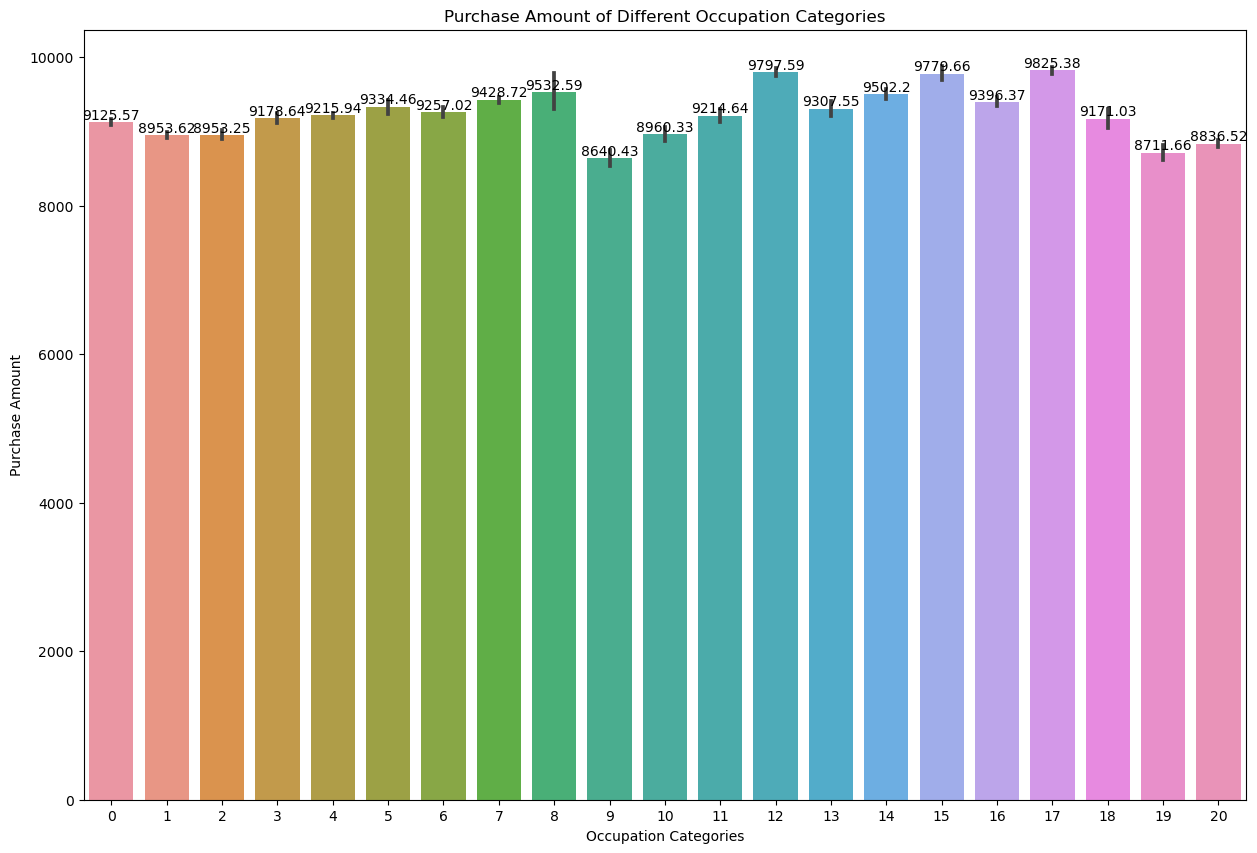

In [58]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Occupation_Category',y='Purchase_Amount', data=data)
plt.xlabel("Occupation Categories")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount of Different Occupation Categories")

for i in ax.containers:
    ax.bar_label(i,)

In [59]:
city_category_purchase = data.groupby('City_Category')['Purchase_Amount'].mean()
city_category_purchase

City_Category
A    8912.829970
B    9151.927839
C    9723.075248
Name: Purchase_Amount, dtype: float64

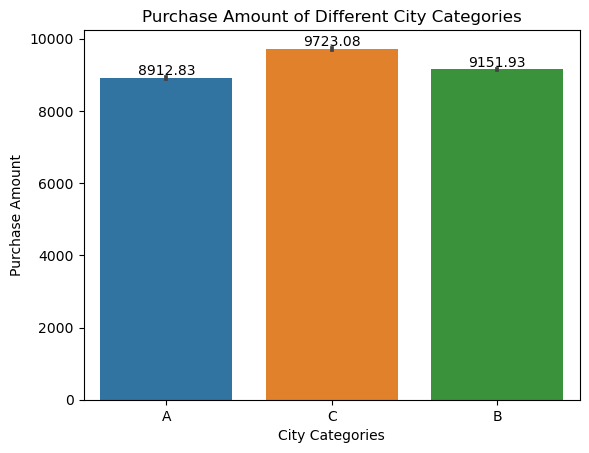

In [60]:
ax = sns.barplot(x='City_Category',y='Purchase_Amount', data=data)
plt.xlabel("City Categories")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount of Different City Categories")

for i in ax.containers:
    ax.bar_label(i,)

([<matplotlib.patches.Wedge at 0x250ac425690>,
 [Text(0.24023118446832167, 0.3805114689584891, 'City A'),
  Text(-0.44811331185582537, 0.041163815877586114, 'City B'),
  Text(0.20441671425859137, -0.40089126572141903, 'City C')],
 [Text(0.667308845745338, 1.0569763026624697, '8912.83'),
  Text(-1.2447591995995149, 0.11434393299329476, '9151.93'),
  Text(0.5678242062738649, -1.113586849226164, '9723.08')])

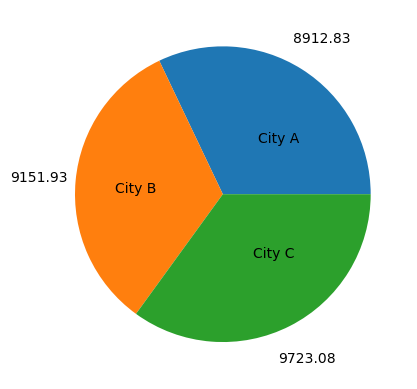

In [61]:
plt.pie(city_category_purchase, labels=['City A','City B','City C'], labeldistance=0.45, autopct= lambda x: '{:0.2f}'.format(x*city_category_purchase.sum()/100), pctdistance=1.25)

In [62]:
current_stay_purchase = data.groupby('Current_Stay')['Purchase_Amount'].mean()
current_stay_purchase

Current_Stay
0     9181.118954
1     9252.300775
2     9321.963184
3     9287.542095
4+    9276.607969
Name: Purchase_Amount, dtype: float64

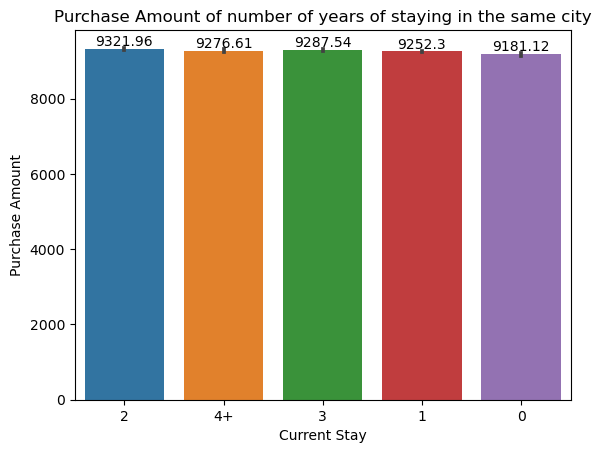

In [63]:
ax = sns.barplot(x='Current_Stay',y='Purchase_Amount', data=data)
plt.xlabel("Current Stay")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount of number of years of staying in the same city")

for i in ax.containers:
    ax.bar_label(i,)

In [64]:
marital_purchase = data.groupby('Marital_Status')['Purchase_Amount'].mean()
marital_purchase

Marital_Status
Married      9262.277371
Unmarried    9267.599368
Name: Purchase_Amount, dtype: float64

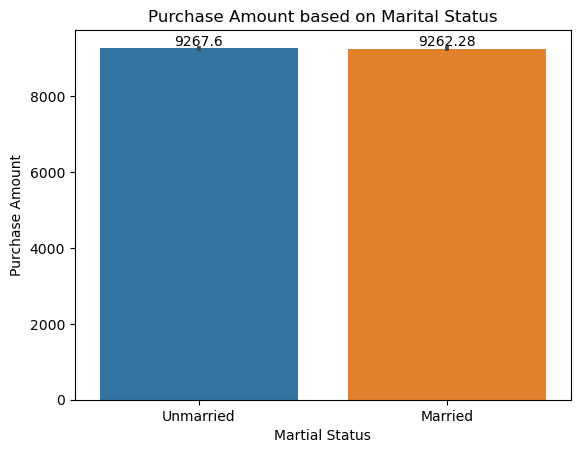

In [65]:
ax = sns.barplot(x='Marital_Status',y='Purchase_Amount', data=data)
plt.xlabel("Martial Status")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount based on Marital Status")

for i in ax.containers:
    ax.bar_label(i,)

In [66]:
product_1_purchase = data.groupby('Product_Category_1')['Purchase_Amount'].mean()
product_1_purchase

Product_Category_1
1     13605.904857
2     11251.989565
3     10096.637223
4      2329.474383
5      6239.978986
6     15838.175292
7     16365.689600
8      7498.711742
9     15537.375610
10    19675.570927
11     4685.298600
12     1350.818205
13      722.125023
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2973.071383
19       37.051881
20      370.150869
Name: Purchase_Amount, dtype: float64

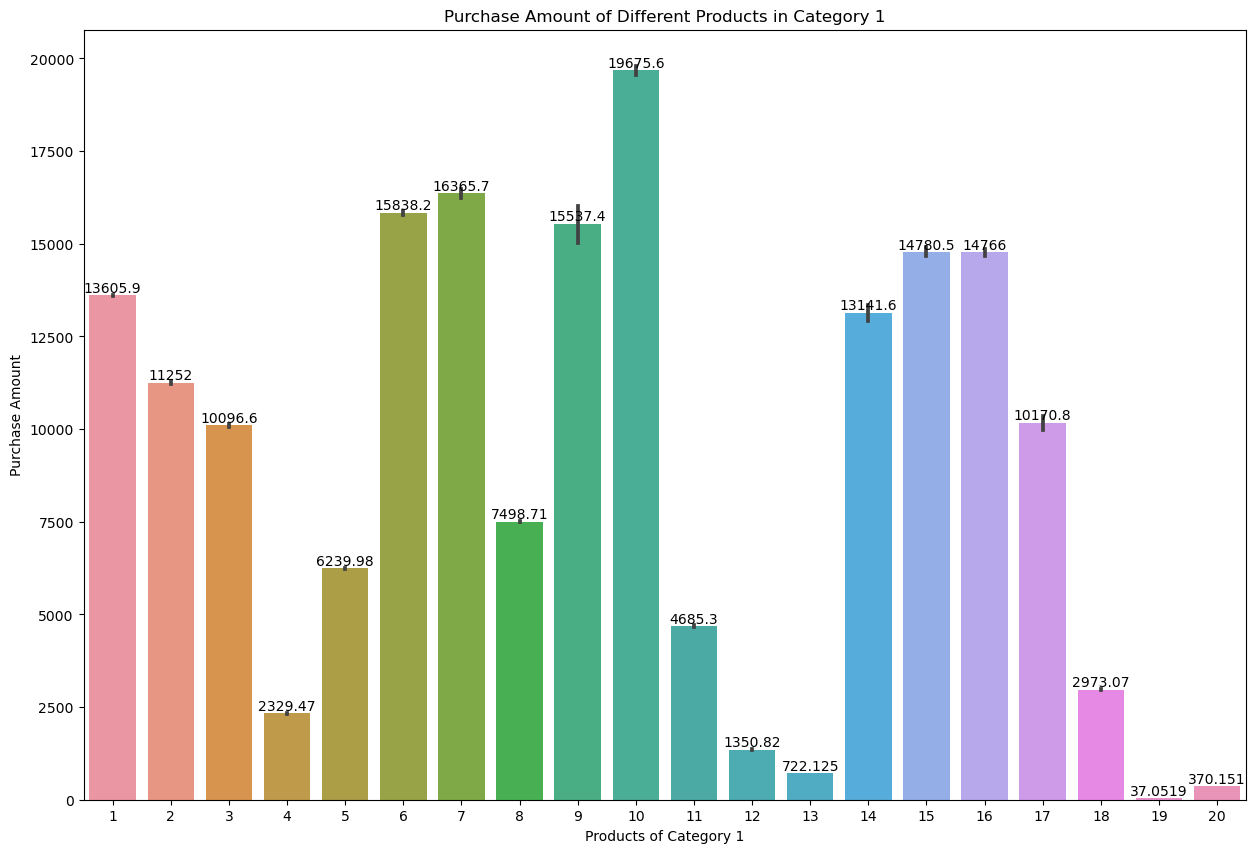

In [67]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Product_Category_1',y='Purchase_Amount', data=data)
plt.xlabel("Products of Category 1")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount of Different Products in Category 1")

for i in ax.containers:
    ax.bar_label(i,)

In [68]:
product_2_purchase = data.groupby('Product_Category_2')['Purchase_Amount'].mean()
product_2_purchase

Product_Category_2
2     13618.863361
3     11235.359570
4     10215.084992
5      9028.067554
6     11503.486817
7      6884.683706
8      8263.780148
9      7277.341005
10    15648.392505
11     8942.010406
12     6975.472504
13     9683.308576
14     7105.359576
15    10358.018551
16    10298.184508
17     9422.588165
18     9350.954841
Name: Purchase_Amount, dtype: float64

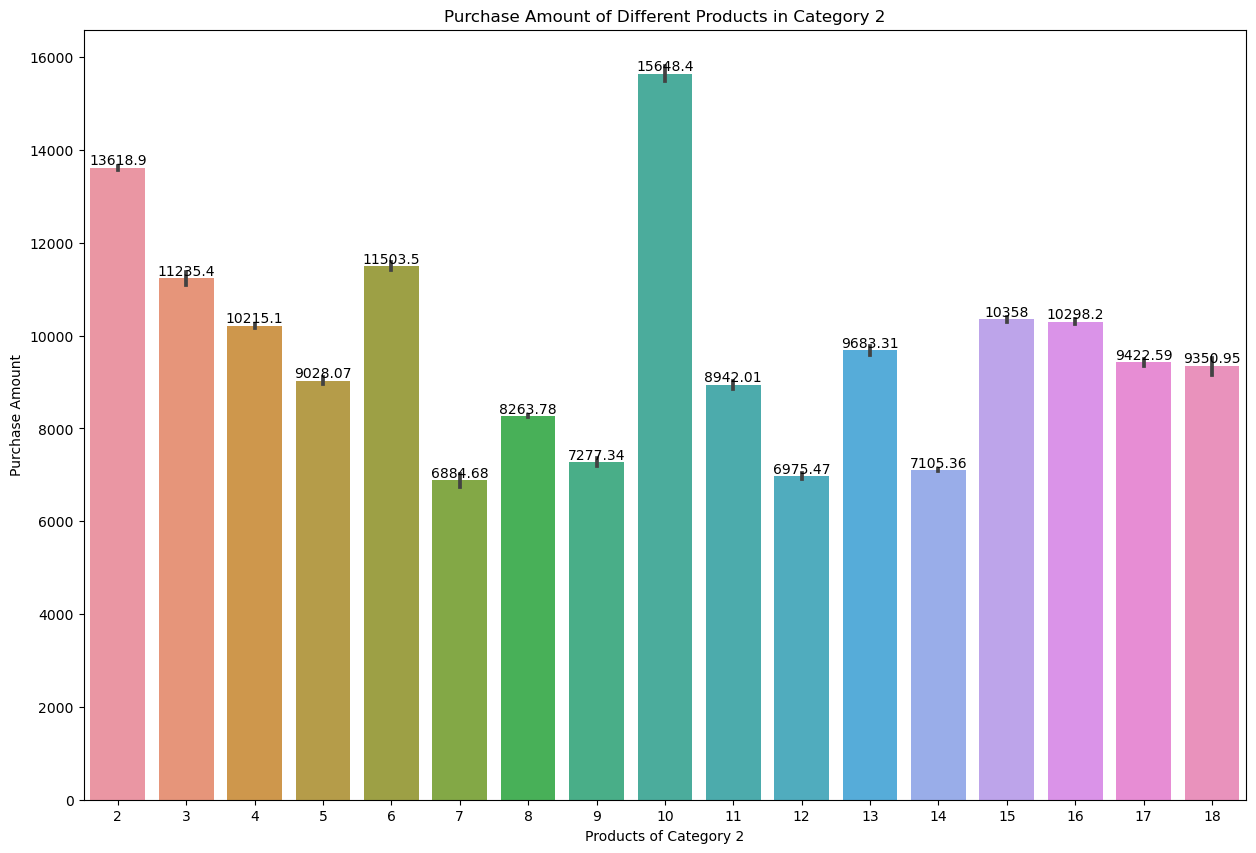

In [69]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Product_Category_2',y='Purchase_Amount', data=data)
plt.xlabel("Products of Category 2")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount of Different Products in Category 2")

for i in ax.containers:
    ax.bar_label(i,)

In [70]:
product_3_purchase = data.groupby('Product_Category_3')['Purchase_Amount'].mean()
product_3_purchase

Product_Category_3
3     13939.696574
4      9794.386667
5     12117.922546
6     13193.781550
8     13024.575410
9     10432.291760
10    13505.813441
11    12091.437673
12     8716.647765
13    13184.479480
14    10052.594530
15    12339.369479
16     8518.688356
17    11768.526502
18    10993.980773
Name: Purchase_Amount, dtype: float64

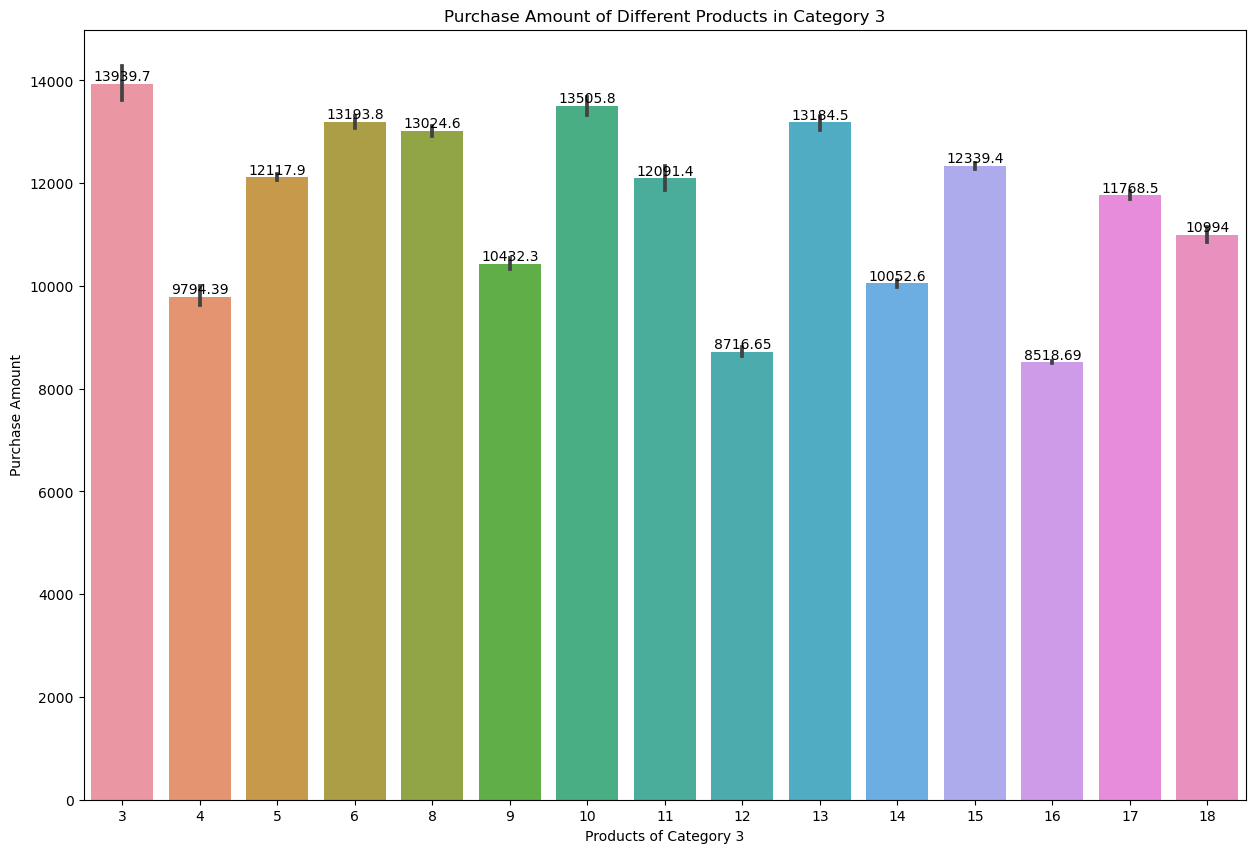

In [71]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Product_Category_3',y='Purchase_Amount', data=data)
plt.xlabel("Products of Category 3")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount of Different Products in Category 3")

for i in ax.containers:
    ax.bar_label(i,)

In [72]:
df = data.copy()

In [73]:
data1 = data.copy()

In [74]:
data1.columns

Index(['Product_ID', 'Gender', 'Age_Group', 'Occupation_Category',
       'City_Category', 'Current_Stay', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase_Amount'],
      dtype='object')

In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549867 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Product_ID           549867 non-null  object
 1   Gender               549867 non-null  object
 2   Age_Group            549867 non-null  object
 3   Occupation_Category  549867 non-null  int64 
 4   City_Category        549867 non-null  object
 5   Current_Stay         549867 non-null  object
 6   Marital_Status       549867 non-null  object
 7   Product_Category_1   549867 non-null  int64 
 8   Product_Category_2   549867 non-null  int32 
 9   Product_Category_3   549867 non-null  int32 
 10  Purchase_Amount      549867 non-null  int64 
dtypes: int32(2), int64(3), object(6)
memory usage: 46.1+ MB


In [76]:
data1.head()

,Product_ID,Gender,Age_Group,Occupation_Category,City_Category,Current_Stay,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,P00069042,F,Children,10,A,2,Unmarried,3,8,16,8370
1,P00248942,F,Children,10,A,2,Unmarried,1,6,14,15200
2,P00087842,F,Children,10,A,2,Unmarried,12,8,16,1422
3,P00085442,F,Children,10,A,2,Unmarried,12,14,16,1057
4,P00285442,M,Old,16,C,4+,Unmarried,8,8,16,7969


In [77]:
data1['Age_Group'] = data1['Age_Group'].map({"Children":0,"Young Adult":1,"Adult":2,"Old":3})

In [78]:
data1['Gender'] = data1['Gender'].map({"F":0,"M":1})

In [79]:
data1['City_Category'] = data1['City_Category'].map({"A":0,"B":1,"C":2})

In [80]:
data1['Current_Stay'] = data1['Current_Stay'].map({"0":0,"1":1,"2":2,"3":3,"4+":4})

In [81]:
data1['Marital_Status'] = data1['Marital_Status'].map({"Unmarried":0,"Married":1})

In [82]:
data1 = data1.loc[:,['Gender', 'Age_Group', 'Occupation_Category',
       'City_Category', 'Current_Stay', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase_Amount']]

<Axes: >

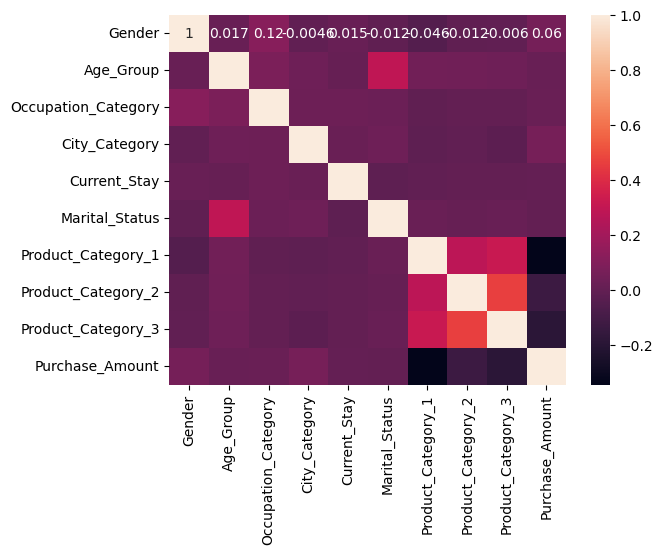

In [83]:
sns.heatmap(data1.corr(), annot=True, cmap=None)

In [84]:
features = data1.corr()['Purchase_Amount'].sort_values(ascending=True)
features

Product_Category_1    -0.343068
Product_Category_3    -0.185900
Product_Category_2    -0.128680
Marital_Status        -0.000521
Current_Stay           0.005360
Age_Group              0.018288
Occupation_Category    0.020874
Gender                 0.060462
City_Category          0.062102
Purchase_Amount        1.000000
Name: Purchase_Amount, dtype: float64

<Axes: >

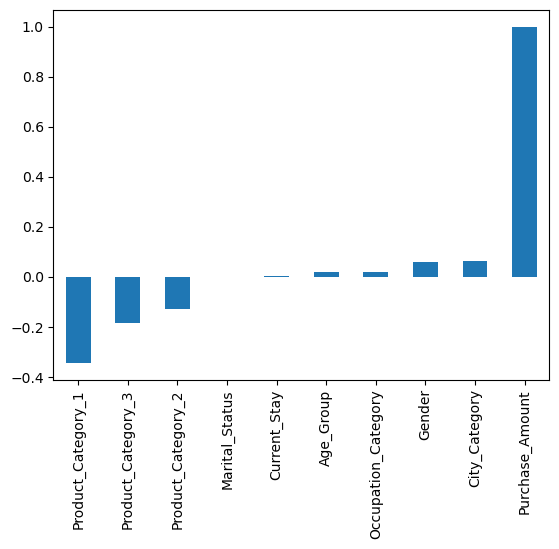

In [85]:
features.plot(kind='bar')